<a href="https://colab.research.google.com/github/SuryARavichan/Chatbot/blob/main/Kerala_flood_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,KFold,GridSearchCV
from sklearn import metrics
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
plt.rcParams['figure.figsize'] = [15,8]

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


The dataset consisting of rainfall details of Kerala of previous 117 years, it clearly defines the annual as well as the monthly rainfall data.

In [ ]:
df = pd.read_csv("/content/drive/My Drive/Time Series/kerala.csv")

In [ ]:
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO


In [ ]:
df.tail()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
113,KERALA,2014,4.6,10.3,17.9,95.7,251.0,454.4,677.8,733.9,298.8,355.5,99.5,47.2,3046.4,YES
114,KERALA,2015,3.1,5.8,50.1,214.1,201.8,563.6,406.0,252.2,292.9,308.1,223.6,79.4,2600.6,NO
115,KERALA,2016,2.4,3.8,35.9,143.0,186.4,522.2,412.3,325.5,173.2,225.9,125.4,23.6,2176.6,NO
116,KERALA,2017,1.9,6.8,8.9,43.6,173.5,498.5,319.6,531.8,209.5,192.4,92.5,38.1,2117.1,NO
117,KERALA,2018,29.1,52.1,48.6,116.4,183.8,625.4,1048.5,1398.9,423.6,356.1,125.4,65.1,4473.0,YES


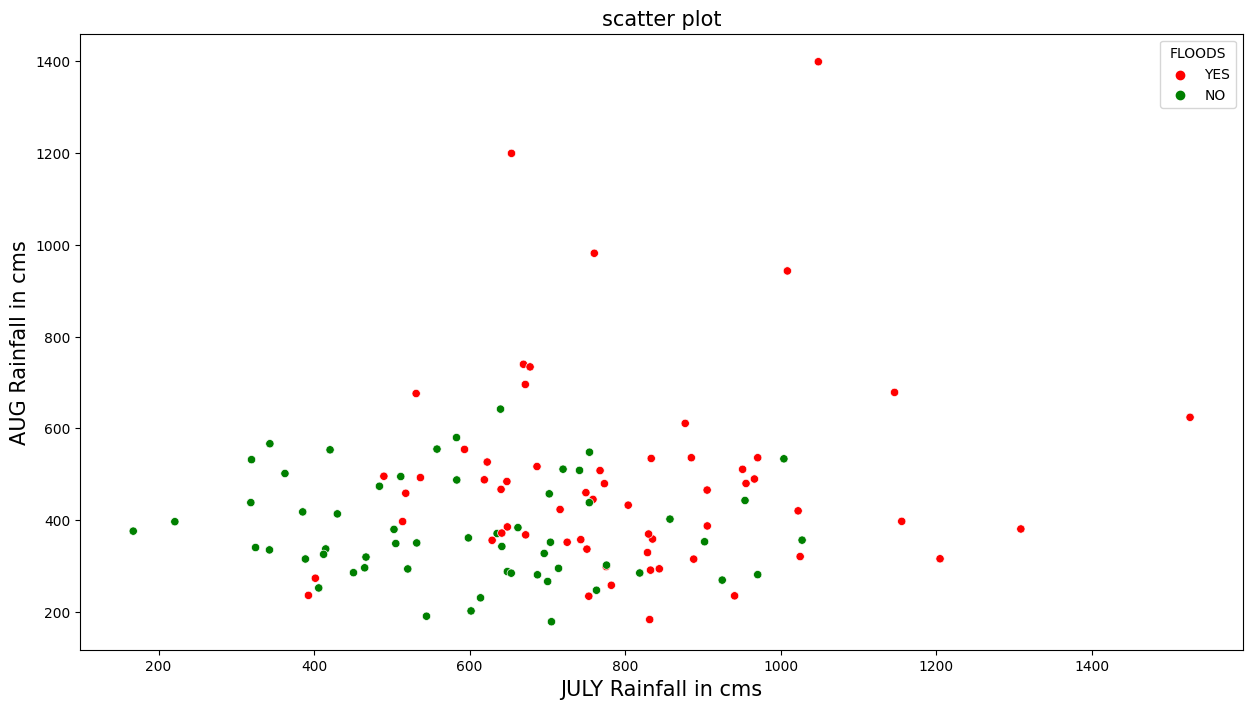

In [ ]:
sns.scatterplot(x = 'JUL', y = 'AUG', data = df, hue = 'FLOODS',palette=['red','green'])
plt.title('scatter plot', fontsize = 15)
plt.xlabel('JULY Rainfall in cms', fontsize = 15)
plt.ylabel('AUG Rainfall in cms', fontsize = 15)
plt.show()

We can understand from the above scatter plot, flood and non-flood data points are linearly non seperable. We need a Non-linear ML model to train the above dataset.

In [ ]:
df.columns

Index(['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', ' ANNUAL RAINFALL', 'FLOODS'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SUBDIVISION       118 non-null    object 
 1   YEAR              118 non-null    int64  
 2   JAN               118 non-null    float64
 3   FEB               118 non-null    float64
 4   MAR               118 non-null    float64
 5   APR               118 non-null    float64
 6   MAY               118 non-null    float64
 7   JUN               118 non-null    float64
 8   JUL               118 non-null    float64
 9   AUG               118 non-null    float64
 10  SEP               118 non-null    float64
 11  OCT               118 non-null    float64
 12  NOV               118 non-null    float64
 13  DEC               118 non-null    float64
 14   ANNUAL RAINFALL  118 non-null    float64
 15  FLOODS            118 non-null    object 
dtypes: float64(13), int64(1), object(2)
memory u

In [ ]:
df['FLOODS'].replace(['YES','NO'],[1,0],inplace=True)
df.tail()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
113,KERALA,2014,4.6,10.3,17.9,95.7,251.0,454.4,677.8,733.9,298.8,355.5,99.5,47.2,3046.4,1
114,KERALA,2015,3.1,5.8,50.1,214.1,201.8,563.6,406.0,252.2,292.9,308.1,223.6,79.4,2600.6,0
115,KERALA,2016,2.4,3.8,35.9,143.0,186.4,522.2,412.3,325.5,173.2,225.9,125.4,23.6,2176.6,0
116,KERALA,2017,1.9,6.8,8.9,43.6,173.5,498.5,319.6,531.8,209.5,192.4,92.5,38.1,2117.1,0
117,KERALA,2018,29.1,52.1,48.6,116.4,183.8,625.4,1048.5,1398.9,423.6,356.1,125.4,65.1,4473.0,1


In [ ]:
df['FLOODS'].value_counts()

1    60
0    58
Name: FLOODS, dtype: int64

Exploratory Analysis

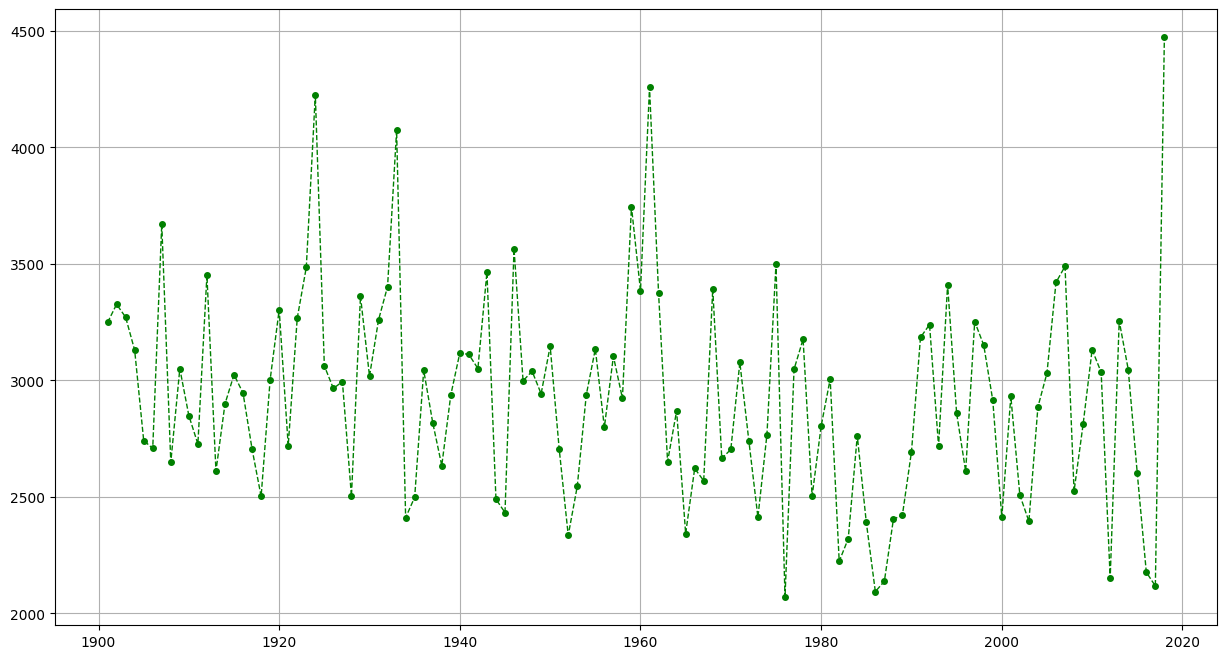

In [ ]:
#Which year has the highest rainfall?
plt.plot(df['YEAR'],df[' ANNUAL RAINFALL'],'go--',linestyle='dashed',linewidth=1, markersize=4)
plt.grid()
plt.show()

1924, 1933,1961,2018 are the years Annual Rainfall exceeded 4000 cm, Kerala experienced severe floods

In [ ]:
df[df[' ANNUAL RAINFALL']>4000]

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
23,KERALA,1924,19.3,2.9,66.6,111.0,185.4,1011.7,1526.5,624.0,289.1,176.5,162.9,50.4,4226.4,1
32,KERALA,1933,1.0,9.3,36.9,139.5,738.8,859.3,773.4,479.5,469.7,397.0,126.1,42.3,4072.9,1
60,KERALA,1961,13.7,31.3,11.4,94.1,500.5,1005.2,1146.5,678.3,399.3,274.2,85.9,17.5,4257.8,1
117,KERALA,2018,29.1,52.1,48.6,116.4,183.8,625.4,1048.5,1398.9,423.6,356.1,125.4,65.1,4473.0,1


<Axes: title={'center': 'JUN'}, xlabel='FLOODS'>

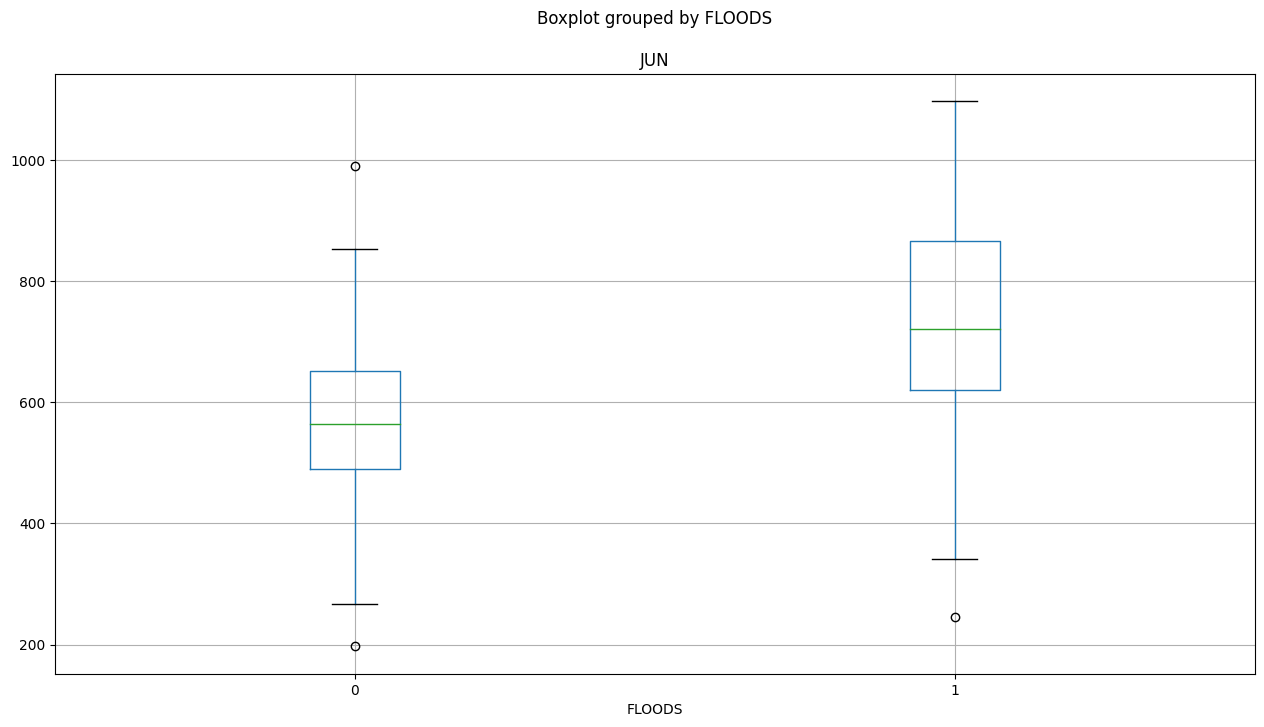

In [ ]:
df.boxplot(column='JUN',by='FLOODS')

During the flooded years, it is observed the mean rainfall during the month of June exceeds 700cm against 570cm against non flood years

<Axes: title={'center': 'JUL'}, xlabel='FLOODS'>

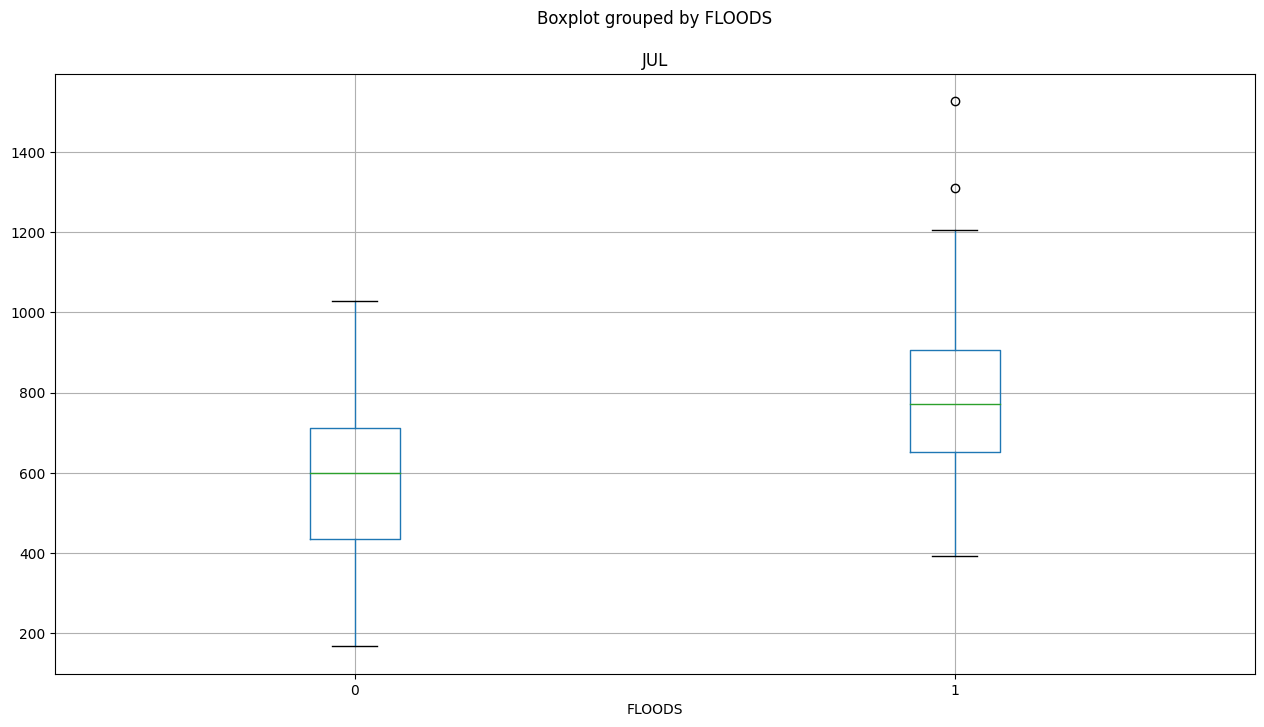

In [ ]:
df.boxplot(column='JUL',by='FLOODS')

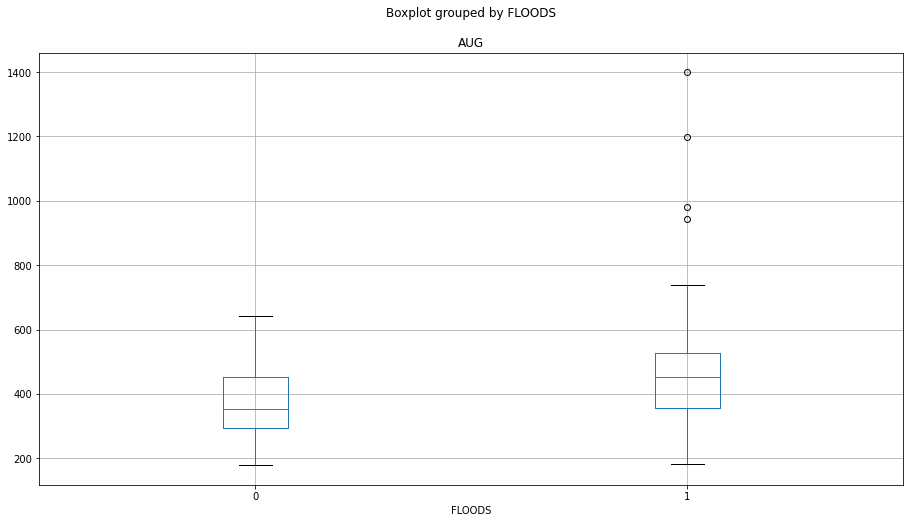

In [ ]:
df.boxplot(column='AUG',by='FLOODS')

Historical data tells, July and August are flood prone months

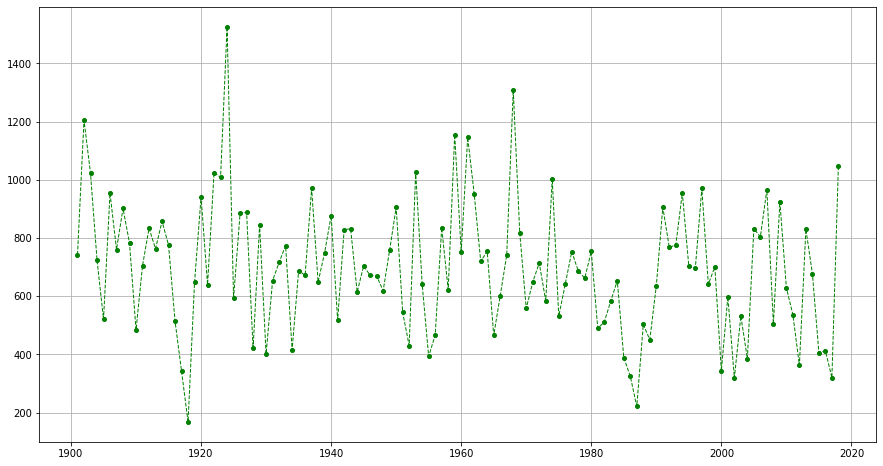

In [ ]:
plt.plot(df['YEAR'],df['JUL'],'go--',linestyle='dashed',linewidth=1, markersize=4)
plt.grid()
plt.show()

In [ ]:
df[df['YEAR']==1968]

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
67,KERALA,1968,7.3,30.5,89.2,133.3,90.0,696.4,1308.9,380.7,325.4,178.9,119.4,32.7,3392.7,1


Exploratory Analysis indicates there is a strong non-linear association with rainfall pattern during monsoon season and floods

Building a model to predict JULY Rainfall from JUNE month

In [ ]:
x=df[['JUN']]
y=df['JUL']

In [ ]:
sc=StandardScaler()
x_std=sc.fit_transform(x)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
LR=LinearRegression()

In [ ]:
kf=KFold(n_splits=3,shuffle=True,random_state=0)
scores=cross_val_score(LR,x_std,y,cv=kf,scoring='neg_root_mean_squared_error')
print(np.mean(np.abs(scores)))
print(np.std(np.abs(scores),ddof=1))

230.11714143843108
15.144059451957778


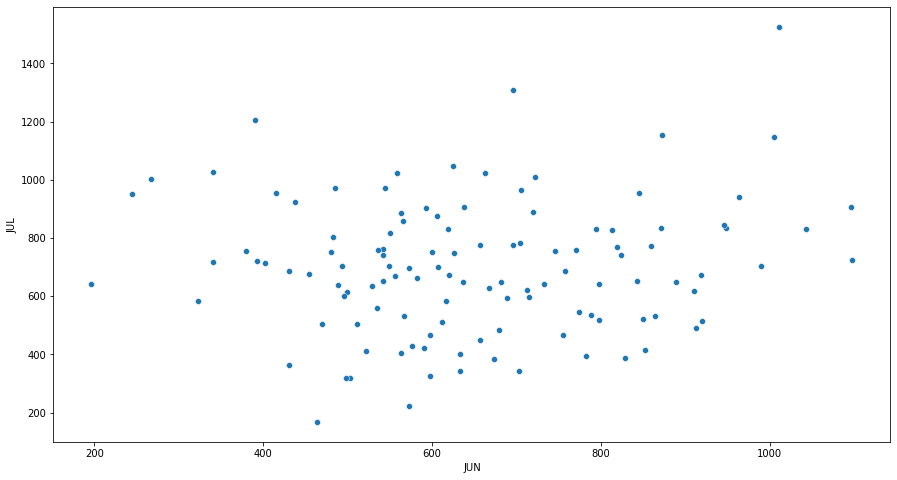

In [ ]:
sns.scatterplot(df['JUN'],df['JUL'])

In [ ]:
knn=KNeighborsRegressor()
params={'n_neighbors':np.arange(2,100),'weights':['uniform','distance']}
GS=GridSearchCV(knn,params,cv=kf,scoring='neg_root_mean_squared_error')
GS.fit(x_std,y)

GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
       70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86,
       87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                         'weights': ['uniform', 'distance']},
             scoring='neg_root_mean_squared_error')

In [ ]:
GS.best_params_

{'n_neighbors': 70, 'weights': 'distance'}

In [ ]:
knn_july=KNeighborsRegressor(n_neighbors=70,weights='distance')

In [ ]:
scores=cross_val_score(knn_july,x_std,y,cv=kf,scoring='neg_root_mean_squared_error')
print(np.mean(np.abs(scores)))
print(np.std(np.abs(scores),ddof=1))

221.082095026762
15.199147552863327


In [ ]:
knn_july.fit(x_std,y)

KNeighborsRegressor(n_neighbors=70, weights='distance')

In [ ]:
GB=GradientBoostingRegressor(random_state=0)
params={'n_estimators':np.arange(2,100)}
GS=GridSearchCV(GB,params,cv=kf,scoring='neg_root_mean_squared_error')
GS.fit(x_std,y)

GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=GradientBoostingRegressor(random_state=0),
             param_grid={'n_estimators': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
       70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86,
       87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             scoring='neg_root_mean_squared_error')

In [ ]:
GS.best_params_

{'n_estimators': 4}

In [ ]:
GB_july=GradientBoostingRegressor(n_estimators=4,random_state=0)
scores=cross_val_score(GB_july,x_std,y,cv=kf,scoring='neg_root_mean_squared_error')
print(np.mean(np.abs(scores)))
print(np.std(np.abs(scores),ddof=1))

224.1214867445362
16.47559195143515


Building a model for June Rainfall prediction

In [ ]:
xj=df[['APR','MAY']]
yj=df['JUN']

In [ ]:
xj_std=sc.fit_transform(xj)

In [ ]:
knn=KNeighborsRegressor()
params={'n_neighbors':np.arange(2,100),'weights':['uniform','distance']}
GS=GridSearchCV(knn,params,cv=kf,scoring='neg_root_mean_squared_error')
GS.fit(xj_std,yj)

GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
       70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86,
       87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                         'weights': ['uniform', 'distance']},
             scoring='neg_root_mean_squared_error')

In [ ]:
GS.best_params_

{'n_neighbors': 47, 'weights': 'uniform'}

In [ ]:
knn_june=KNeighborsRegressor(n_neighbors=47,weights='uniform')
scores=cross_val_score(knn_june,xj_std,yj,cv=kf,scoring='neg_root_mean_squared_error')
print(np.mean(np.abs(scores)))

183.95348874409956


In [ ]:
knn_june.fit(xj_std,yj)

KNeighborsRegressor(n_neighbors=47)

Training a classification model to predict FLOODS

In [ ]:
X=df[['JUN','JUL']]
Y=df['FLOODS']

In [ ]:
X_std=sc.fit_transform(X)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
LogR=LogisticRegression()

In [ ]:
kf=KFold(n_splits=3,shuffle=True,random_state=0)
scores=cross_val_score(LogR,X_std,Y,cv=kf,scoring='recall')
print(np.mean(np.abs(scores)))

0.7285838779956427


In [ ]:
knn=KNeighborsClassifier()

In [ ]:

params={'n_neighbors':np.arange(2,100),'weights':['uniform','distance']}
GS=GridSearchCV(knn,params,cv=kf,scoring='recall')
GS.fit(X_std,Y)

GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
       70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86,
       87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                         'weights': ['uniform', 'distance']},
             scoring='recall')

In [ ]:
GS.best_params_

{'n_neighbors': 17, 'weights': 'uniform'}

In [ ]:
knn_flood=KNeighborsClassifier(n_neighbors=17,weights='uniform')

In [ ]:
scores=cross_val_score(knn_flood,X_std,Y,cv=kf,scoring='recall')
print(np.mean(np.abs(scores)))

0.7604357298474946


In [ ]:
knn_flood.fit(X_std,Y)

KNeighborsClassifier(n_neighbors=17)

In [ ]:
RF=RandomForestClassifier(random_state=0,criterion='entropy')
params={'n_estimators':np.arange(2,100)}
GS=GridSearchCV(RF,params,cv=kf,scoring='recall')
GS.fit(X_std,Y)

GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=RandomForestClassifier(criterion='entropy',
                                              random_state=0),
             param_grid={'n_estimators': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
       70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86,
       87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             scoring='recall')

In [ ]:
GS.best_params_

{'n_estimators': 47}

In [ ]:
RF_flood=RandomForestClassifier(n_estimators=47,random_state=0,criterion='entropy')

In [ ]:
scores=cross_val_score(RF_flood,X_std,Y,cv=kf,scoring='recall')
print(np.mean(np.abs(scores)))

0.7160348583877996


In [ ]:
RF_flood.fit(X_std,Y)

RandomForestClassifier(n_estimators=13, random_state=0)

In [ ]:
GB=GradientBoostingClassifier(random_state=0)
params={'n_estimators':np.arange(2,100)}
GS=GridSearchCV(GB,params,cv=kf,scoring='recall')
GS.fit(X_std,Y)

GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'n_estimators': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
       70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86,
       87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             scoring='recall')

In [ ]:
GS.best_params_

{'n_estimators': 5}

In [ ]:
GB_flood=GradientBoostingClassifier(n_estimators=5,random_state=0)

In [ ]:
scores=cross_val_score(GB_flood,X_std,Y,cv=kf,scoring='recall')
print(np.mean(np.abs(scores)))

0.7293681917211329


Building Classification model using LDA Transformation

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [ ]:
lda = LDA(n_components = 1)

In [ ]:
X_LDA=lda.fit_transform(X_std, Y)

In [ ]:
scores=cross_val_score(LogR,X_LDA,Y,cv=kf,scoring='recall')
print(np.mean(np.abs(scores)))

0.8170806100217866


In [ ]:
knn=KNeighborsClassifier()
params={'n_neighbors':np.arange(2,100),'weights':['uniform','distance']}
GS=GridSearchCV(knn,params,cv=kf,scoring='recall')
GS.fit(X_LDA,Y)

GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
       70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86,
       87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                         'weights': ['uniform', 'distance']},
             scoring='recall')

In [ ]:
GS.best_params_

{'n_neighbors': 15, 'weights': 'uniform'}

In [ ]:
knn_flood_lda=KNeighborsClassifier(n_neighbors=15,weights='uniform')

In [ ]:
scores=cross_val_score(knn_flood_lda,X_LDA,Y,cv=kf,scoring='recall')
print(np.mean(np.abs(scores)))

0.8252287581699346


We have observed transformation helped for Linear Model to improve the performance. However, LDA have no big impact in non-linear models.

In [ ]:
J=df['JUL']

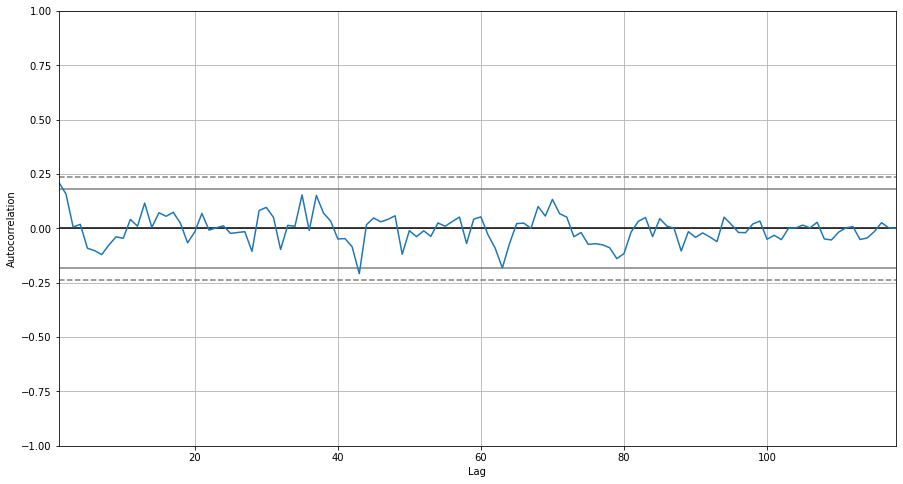

In [ ]:
pd.plotting.autocorrelation_plot(J)

In [ ]:
A=df['AUG']

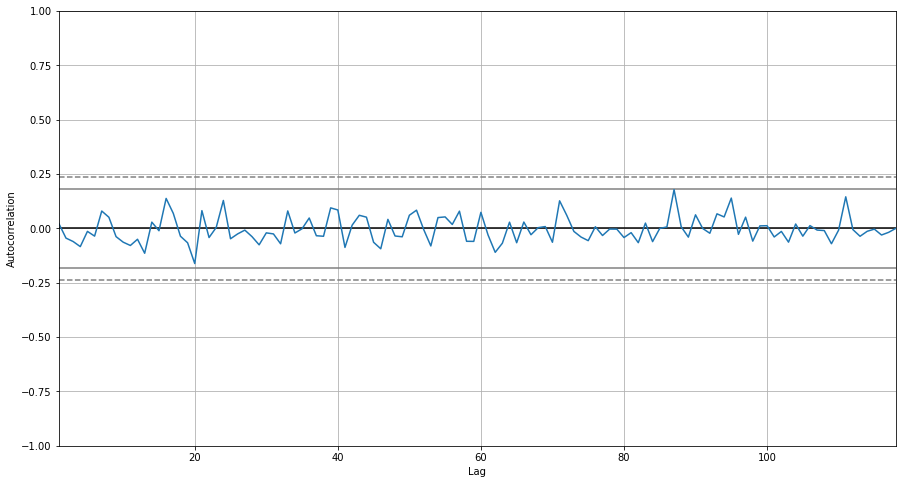

In [ ]:
pd.plotting.autocorrelation_plot(A)
plt.show()

In [ ]:
JN=df['JUN']

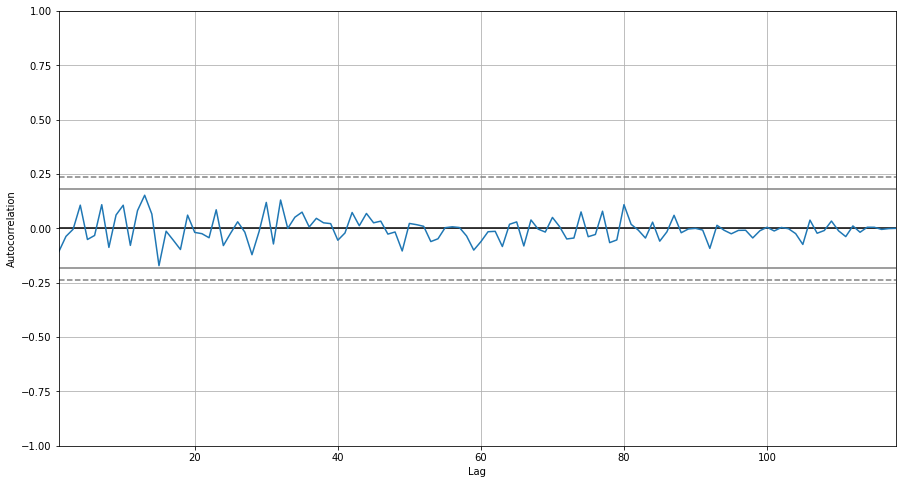

In [ ]:
pd.plotting.autocorrelation_plot(JN)
plt.show()

Validating the performance for 2018 floods

Step-1: Forecasting the JUN, JULY and AUG rainfall for 2018

In [ ]:
#2018 rainfall in the month of April & May
df_2018=df[df['YEAR']==2018]
df_2018

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
117,KERALA,2018,29.1,52.1,48.6,116.4,183.8,625.4,1048.5,1398.9,423.6,356.1,125.4,65.1,4473.0,1


In [ ]:
X_apr_may_2018=df_2018[['APR','MAY']]
X_apr_may_2018

,APR,MAY
117,116.4,183.8


In [ ]:
X_apr_may_2018_sc=sc.transform(X_apr_may_2018)

In [ ]:
knn_june.predict(X_apr_may_2018_sc)

array([660.95957447])

July Forecast for 2018

In [ ]:
X_june=sc.transform([[660.95]])

In [ ]:
knn_july.predict(X_june)

array([714.71743884])

Predicting flood for 2018

In [ ]:
X_input_flood=sc.transform([[660.95,714.72]])

In [ ]:
knn_flood.predict(X_input_flood)

array([1])